In [1]:
import torch
torch.ones((1, 1)).cuda()
torch.cuda.empty_cache()
import torch
import gc
for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
            print(type(obj), obj.size())
    except: pass
    


In [3]:

from fastai.vision import *

In [4]:
folder = 'tomato'
file = 'urls_black.csv'

In [5]:
folder = 'lemon'
file = 'urls_teddys.csv'

In [6]:
folder = 'onion'
file = 'urls_grizzly.csv'

In [7]:
path = Path('D:\pata')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
path.ls()

[WindowsPath('D:/pata/lemon'),
 WindowsPath('D:/pata/onion'),
 WindowsPath('D:/pata/tomato')]

In [9]:
classes = ['lemon','onion','tomato']

In [10]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

lemon


onion


tomato


In [11]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [9]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [12]:
data.classes

['lemon', 'onion', 'tomato']

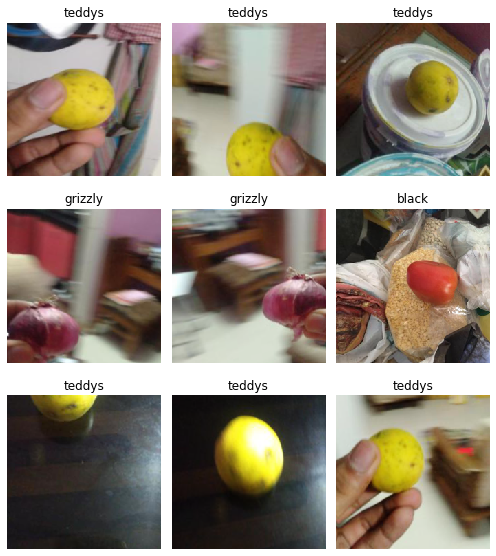

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['lemon', 'onion', 'tomato'], 3, 182, 45)

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [15]:
torch.cuda.empty_cache()

In [16]:
learn.destroy()

this Learner object self-destroyed - it still exists, but no longer usable


In [18]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.400648,0.896085,0.422222,00:41
1,1.116672,0.506165,0.222222,00:38
2,0.851061,0.360213,0.133333,00:38
3,0.681279,0.333551,0.088889,00:38
4,0.563371,0.322069,0.088889,00:38
5,0.479630,0.312087,0.088889,00:38


In [19]:
learn.save('stage-1')

In [20]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


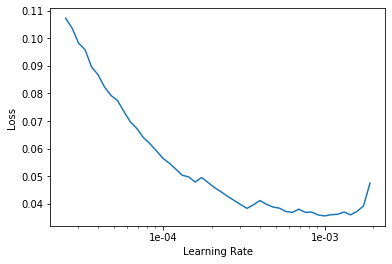

In [21]:
# If the plot is not showing try to give a start and end learning rate
learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(15, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.240029,0.529313,0.088889,00:41
1,0.201565,0.343571,0.066667,00:41
2,0.184677,0.243865,0.066667,00:38
3,0.152072,0.140216,0.066667,00:38
4,0.137111,0.078781,0.066667,00:38
5,0.118314,0.063106,0.022222,00:38
6,0.103892,0.075914,0.044444,00:38
7,0.093019,0.105093,0.044444,00:38
8,0.086348,0.091065,0.044444,00:38
9,0.080934,0.088415,0.044444,00:38


In [29]:
learn.save('stage-2')

## Interpretation

In [30]:
learn.load('stage-2');

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

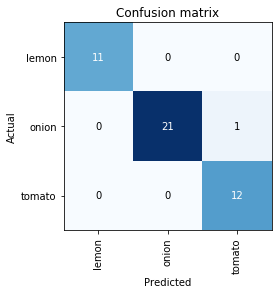

In [32]:
interp.plot_confusion_matrix()

In [33]:
from fastai.widgets import *

In [34]:

db  = (ImageList.from_folder(path)
        .random_split_by_pct()
            .label_from_folder()
            .transform(tfms=get_transforms(), size=64)
        .databunch())


C:\Users\Tanmay Kadam\anaconda3\envs\fastai_v1\lib\site-packages\fastai\data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [35]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [36]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [50]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [37]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [38]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

In [39]:
learn.export()

In [40]:
defaults.device = torch.device('cpu')

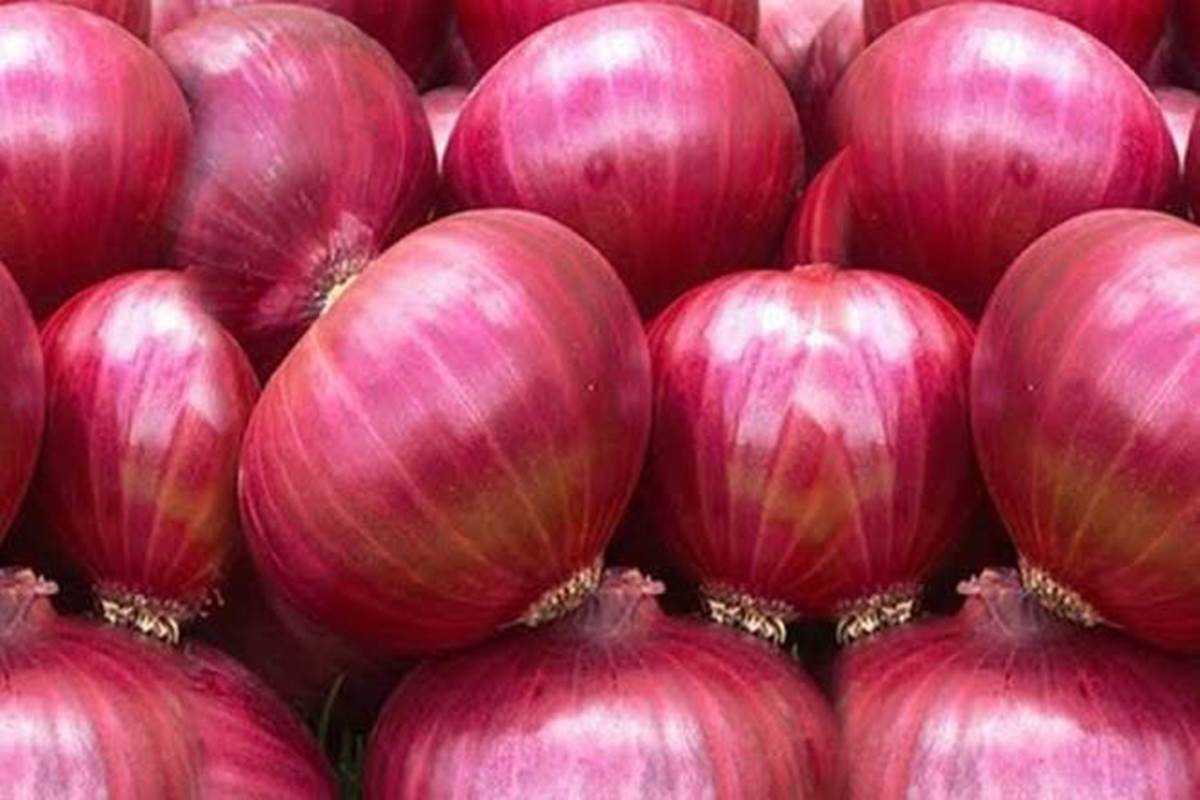

In [51]:
img = open_image('D:\onion1.jpg')
img

In [52]:
learn = load_learner(path)

In [53]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category onion